In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv ('Ex84.csv', sep = ';')
data = data[data['Gender'] == 'male']
data.head()

,Length,Width,Height,Gender
24,93,74,37,male
25,94,78,35,male
26,96,80,35,male
27,101,84,39,male
28,102,85,38,male


In [3]:
data.drop(columns = ['Gender'], inplace = True)
data.head()

,Length,Width,Height
24,93,74,37
25,94,78,35
26,96,80,35
27,101,84,39
28,102,85,38


In [4]:
data = data.apply(np.log, inplace = True)
data.head()

,Length,Width,Height
24,4.532599,4.304065,3.610918
25,4.543295,4.356709,3.555348
26,4.564348,4.382027,3.555348
27,4.615121,4.430817,3.663562
28,4.624973,4.442651,3.637586


In [5]:
np.mean(data)

Length    4.725444
Width     4.477574
Height    3.703186
dtype: float64

In [6]:
cov = np.cov(data, rowvar = False, bias = False)
cov

array([[0.011072  , 0.00801914, 0.00815965],
       [0.00801914, 0.00641673, 0.00600527],
       [0.00815965, 0.00600527, 0.00677276]])

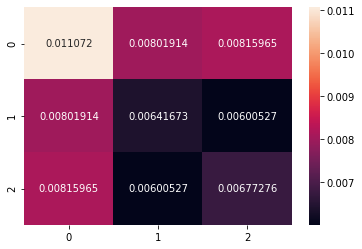

In [7]:
sns.heatmap(cov, annot=True, fmt='g')

In [8]:
autovalor, autovetor = np.linalg.eig(cov)
autovalor

array([0.02330335, 0.00035984, 0.0005983 ])

In [9]:
autovetor

array([[-0.68310233, -0.71269743, -0.15947908],
       [-0.51021953,  0.62195341, -0.59401177],
       [-0.52253923,  0.32440148,  0.78848997]])

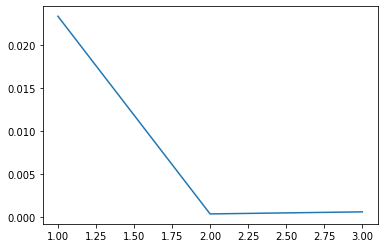

In [10]:
x = [i for i in range(1, len(autovalor)+1)]
plt.plot(np.array(x), autovalor)


In [11]:
vartotal = np.sum(autovalor)
vartotal

0.02426148799417313

In [12]:
varacumualda = np.cumsum(autovalor)/vartotal
varacumualda

array([0.96050774, 0.97533931, 1.        ])

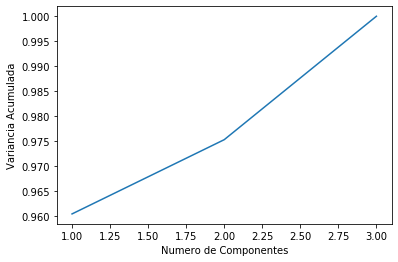

In [13]:
plt.plot(x, varacumualda)
plt.xlabel('Numero de Componentes')
plt.ylabel('Variancia Acumulada')
plt.show()

In [14]:
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit_transform(data)

array([[-0.26847339,  0.0610685 ],
       [-0.26334498, -0.01572444],
       [-0.23604571, -0.03412109],
       [-0.11992348,  0.01412518],
       [-0.12072839, -0.01495728],
       [-0.15259278, -0.00890821],
       [-0.1060393 ,  0.01657116],
       [-0.09302743,  0.01353337],
       [-0.10637104, -0.00124527],
       [-0.00657526, -0.01674418],
       [-0.00626845, -0.01144971],
       [-0.01197959,  0.00080122],
       [ 0.06088692,  0.02804654],
       [ 0.04186297, -0.01087663],
       [ 0.04750082, -0.01744036],
       [ 0.07017126, -0.03305727],
       [ 0.04055393, -0.0277471 ],
       [ 0.11278808,  0.02128941],
       [ 0.10500463, -0.02935366],
       [ 0.15241663,  0.03249878],
       [ 0.17945856,  0.01110821],
       [ 0.17947359,  0.01607746],
       [ 0.2067839 ,  0.02971295],
       [ 0.29446849, -0.02320759]])